Other Machine Learning Models 

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
import seaborn as sns

%matplotlib inline

C:\Users\clara\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
# Import training Data
train_df = pd.read_csv('../credit_kaggle/GiveMeSomeCredit/cs-training.csv')

In [3]:
# Check data and column types
print(train_df.dtypes) 
train_df.head() 

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Data Cleaning/Wrangling

In [4]:
# Drop Unnamed: 0 Column
train_df = train_df.drop('Unnamed: 0',axis=1)
# Check for NaN
print(train_df.isnull().sum())
train_df.describe()

# Insert data in NaN to fill in empty data
median_monthlyincome = train_df['MonthlyIncome'].median()
median_numofdep = train_df['NumberOfDependents'].median()
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].fillna(median_monthlyincome)
train_df['NumberOfDependents'] = train_df['NumberOfDependents'].fillna(median_numofdep)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


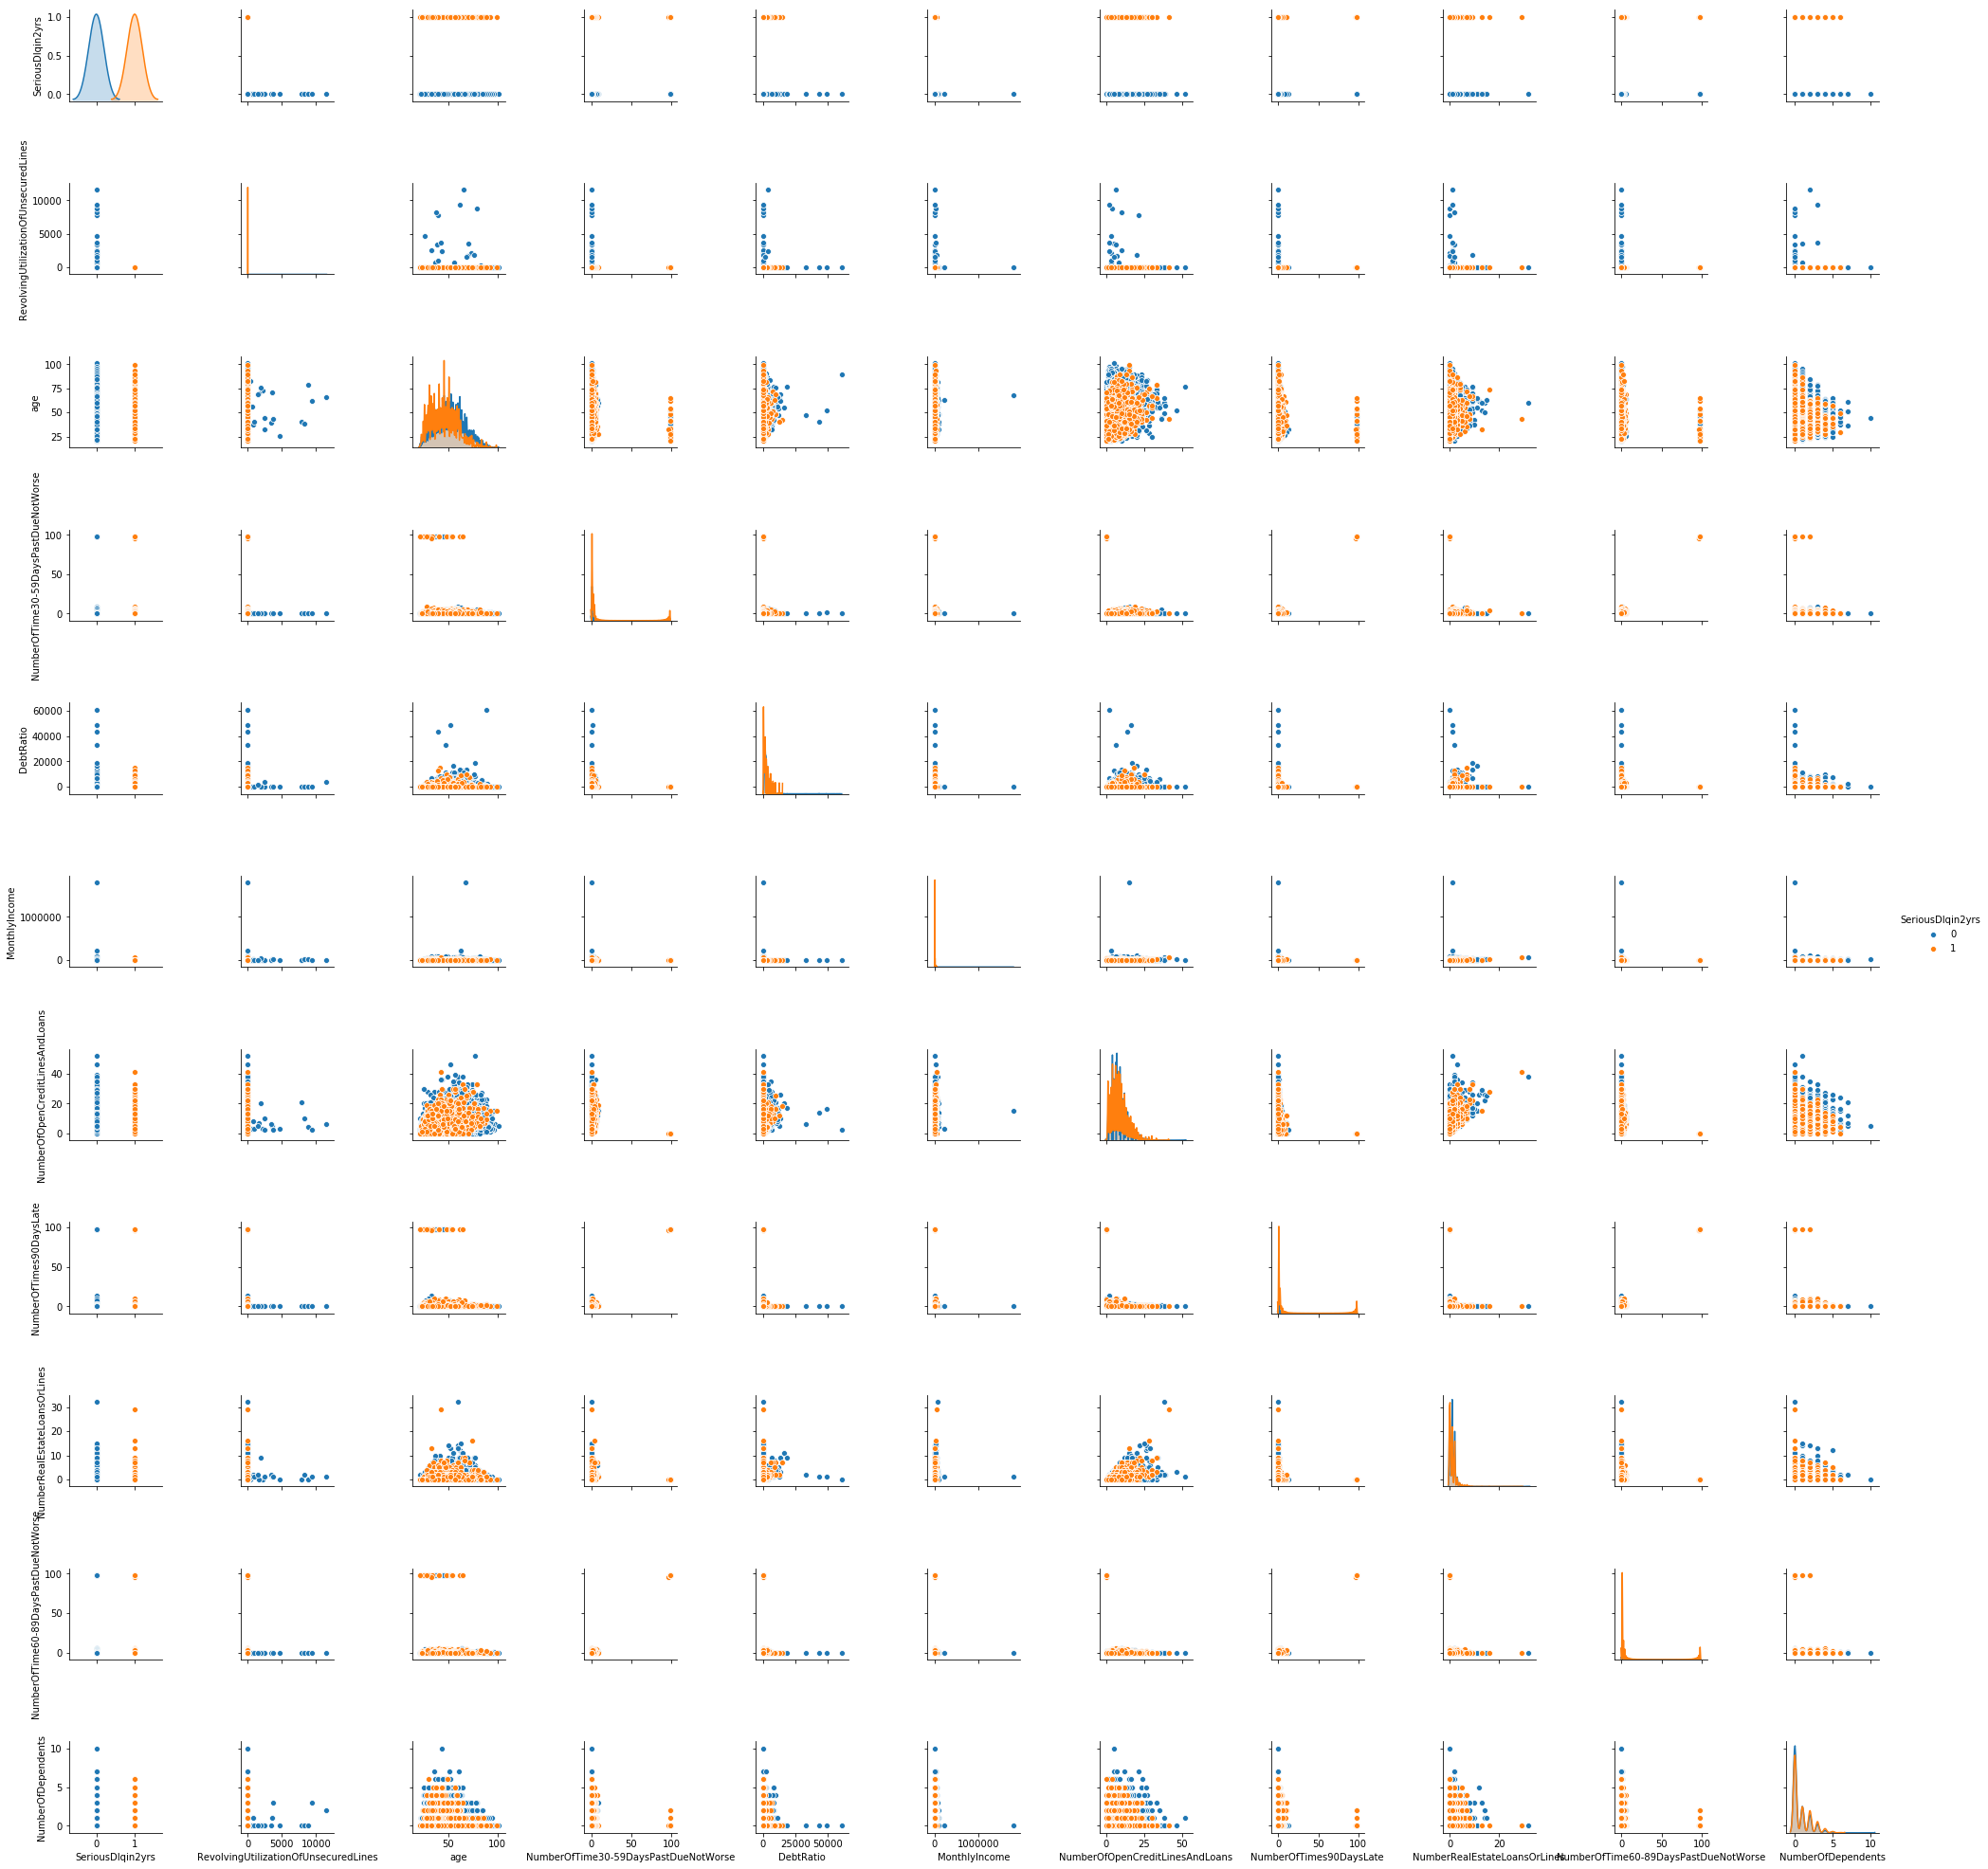

In [5]:
# sns.heatmap(train_df.isnull(),yticklabels=False)
sns.pairplot(train_df.sample(frac=0.1), hue = "SeriousDlqin2yrs",diag_kws={'bw': 0.2})
plt.show()

# **Decision Trees**

In [6]:
# train test split 
X = train_df.drop('SeriousDlqin2yrs',axis=1)
y = train_df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [7]:
# Basic Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [8]:
# Accuracy using AUC Score on test data
y_pred = clf.predict_proba(X_test)
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred[:,1])
auc = metrics.roc_auc_score(y_test,y_pred[:,1])
auc

0.6186412341898835

In [9]:
clf.feature_importances_

array([0.19588973, 0.11951705, 0.03864212, 0.20137548, 0.14661626,
       0.07578499, 0.12752763, 0.03041011, 0.02387993, 0.0403567 ])

Tuning Parameters using GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV
params={"min_samples_leaf":[1,2,3,4,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.3,0.5],
           "max_leaf_nodes":[10,20,30,40,50,60,70]}
tuning_mod=GridSearchCV(clf,
                          param_grid=params,scoring='roc_auc',cv=4,verbose=3)

In [ ]:
tuning_mod.fit(X_train,y_train) #Cleared output for readability

In [12]:
print(tuning_mod.best_params_)
print(tuning_mod.best_score_)

#Use best parameters for clf2
clf2 = tree.DecisionTreeClassifier(min_samples_leaf = 1, min_weight_fraction_leaf = 0.1)
clf2.fit(X_train,y_train)
y_pred = clf2.predict_proba(X_test)
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred[:,1])
auc = metrics.roc_auc_score(y_test,y_pred[:,1])
auc 
#Auc : 0.78 Much higher than not tuned or Neural Network(0.62,0.71)

{'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1}
0.7699565011803401


0.7841240499180537

Tuning hyperparameters increased AUC score from 0.618 to 0.78, which is great improvement of 125% better accuracy

Text(0.5, 1.0, 'Decision Trees AUC Graph')

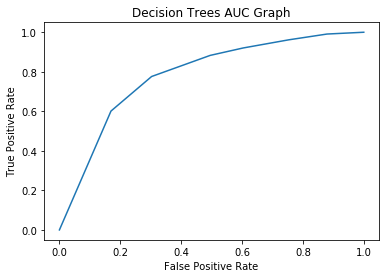

In [17]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Trees AUC Graph")
# Much better result than neural network in analysis.ipynb

In [14]:
# Test dataset data manipulation for model
test_df = pd.read_csv('../credit_kaggle/GiveMeSomeCredit/cs-test.csv')
test_df = test_df.drop('Unnamed: 0',axis=1)
median_monthlyincome = test_df['MonthlyIncome'].median()
median_numofdep = test_df['NumberOfDependents'].median()
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].fillna(median_monthlyincome)
test_df['NumberOfDependents'] = test_df['NumberOfDependents'].fillna(median_numofdep)
test_df = test_df.drop('SeriousDlqin2yrs',axis=1)


# Fit model
y_test_pred = clf2.predict_proba(test_df)

In [15]:
# Create output entry dataframe and output it to csv file

id_col = [i+1 for i in range(len(y_test_pred))]
output_df = pd.DataFrame(id_col,columns=['Id'])
output_df['Probability'] = y_test_pred[:,1]
output_df
output_df.to_csv('output_2.csv',index=False)

# **XGBoost**

In [18]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=None, enable_categorical=False,
       eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='',
       learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
       max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
       missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=1,
       tree_method='exact', use_label_encoder=False, validate_parameters=1,
       verbosity=None)


In [19]:
# Graph for xgboost
y_pred_xgb = xgb_model.predict_proba(X_test)
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred_xgb[:,1])
auc = metrics.roc_auc_score(y_test,y_pred_xgb[:,1])
auc 

0.8618154299660342

Text(0.5, 1.0, 'XGBoost AUC Graph')

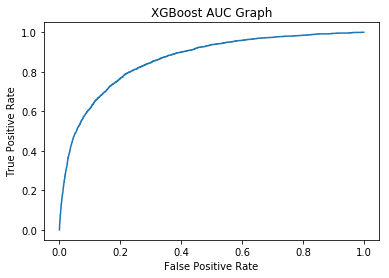

In [20]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost AUC Graph")

The graph is more smooth and has a more preferable shape than the tuned decision tree model.

In [21]:
# Fit test data
y_test_pred_xgb = xgb_model.predict_proba(test_df)

# Create output entry dataframe and output it to csv file
id_col = [i+1 for i in range(len(y_test_pred_xgb))]
xgb_output_df = pd.DataFrame(id_col,columns=['Id'])
xgb_output_df['Probability'] = y_test_pred_xgb[:,1]
xgb_output_df
xgb_output_df.to_csv('output_3.csv',index=False)

Hyperparameter tuning for XGBoost could increase the accuracy, but even before tuning, it does much better than decision trees or a simple ann model that has been tuned.